# Assignment 2 - Machine Learning Basics

## *Shiwen Chen*
Netid:  *sc538*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

**(a)** The sample size $n$ is extremely large, and the number of predictors $p$ is small.

**(b)** The number of predictors $p$ is extremely large, and the number of observations $n$ is small.

**(c)** The relationship between the predictors and response is highly non-linear.

**(d)** The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

(a) A flexible method would be better. The variance of the method wouldn't increase very fast with flexibility given large sample size and small number of predictors while the bias could decrease a lot. The overall MSE of flexible method is very likely smaller than that of the inflexible method.

(b) A inflexible method would be better. The variance of the method would increase very fast with flexibility if sample size is small. A flexible model may lead to overfitting.

(c) A flexible method would be better. If the relationship is known to be highly non-linear, or with more degrees of freedom. A flexible method would likely fit closer to the true trend of data.

(d) A inflexible method would be better. The flexibale method can easily overfit the data by following the noise too closely.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

(a) It's a regression problem as the output variable is CEO salary. We are interested in inference (find out the relationship between factors and salary). n=500, p=3

(b) It's a classification problem as the output is binary (success/failure). We are interested in prediction as we only want to know the outcome. n=20, p=13

(c) It's a regression problem as the output variable is the % change in USD. We are interested in prediction as we only want to know the outcome. n=52, p=3

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A1_X_train_low.csv`, which lets you know whether the file contains features, $X$, or targets, $y$; training or testing data; and is from the low or high dimensional dataset.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

In [166]:
# (a) Write your own kNN classifier
import numpy as np

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.help = "functions: fit(x_train,y_train), predict(x_test,k)"
    
    def fit(self, x, y):
    # Save the training data to properties of this class
        self.x = x
        self.y = y
        self.n = len(x)
        self.p = len(x[0])
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        n = len(x)
        for l in range(n): # For each testing data
            x_dist = [] # Variable to store the distance of x test to each x training
            for i in range(self.n): # For each training data
                if self.p < 10: # Use vectorized method if p is large
                    s = 0 # Variable for sums of squares
                    for j in range(self.p): # For each predictor
                        a = x[l,j]-self.x[i,j]
                        s += a*a
                    x_dist.append(s)
                else:
                    a = x[l,]
                    b = self.x[i,]
                    c = a-b
                    x_dist.append(np.sum(c*c)) # Sums of squares
            x_sorted = sorted(enumerate(x_dist), key=lambda x_dist:x_dist[1]) # sorted list
            # predict y value:
            sum_y = 0 
            for m in range(k): 
                sum_y += self.y[x_sorted[m][0]] # sum y value of nearsest k points
            d = sum_y/k
            if d > 0.5: # assign y prediction to y_hat
                y_hat.append(1)
            else:
                y_hat.append(0)
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y_hat)
    accuracy = np.sum(y == y_hat) / nvalues
    return accuracy

In [169]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each
import pandas as pd
import time
from sklearn.neighbors import KNeighborsClassifier
k = 5

x_train_low = pd.read_csv("./data/A1_X_train_low.csv", header=None).values
y_train_low = pd.read_csv("./data/A1_y_train_low.csv", header=None).values
x_test_low = pd.read_csv("./data/A1_X_test_low.csv", header=None).values
y_test_low = pd.read_csv("./data/A1_y_test_low.csv", header=None).values
x_train_high = pd.read_csv("./data/A1_X_train_high.csv", header=None).values
y_train_high = pd.read_csv("./data/A1_y_train_high.csv", header=None).values
x_test_high = pd.read_csv("./data/A1_X_test_high.csv", header=None).values
y_test_high = pd.read_csv("./data/A1_y_test_high.csv", header=None).values
# My classifier on low
start = time.clock()
low1 = Knn()
low1.fit(x_train_low,y_train_low)
low1_pred = low1.predict(x_test_low,k)
low1_acc = accuracy(y_test_low.T,low1_pred)
time_low1 = time.clock() - start
# My classifier on high
start = time.clock()
high1 = Knn()
high1.fit(x_train_high,y_train_high)
high1_pred = high1.predict(x_test_high,k)
high1_acc = accuracy(y_test_high.T,high1_pred)
time_high1 = time.clock() - start
# Sklearn on low
start = time.clock()
low2 = KNeighborsClassifier(n_neighbors=k)
low2.fit(x_train_low,y_train_low.ravel())
low2_pred = low2.predict(x_test_low)
low2_acc = accuracy(y_test_low.T,low2_pred)
time_low2 = time.clock() - start
# Sklearn on high
start = time.clock()
high2 = KNeighborsClassifier(n_neighbors=k)
high2.fit(x_train_high,y_train_high.ravel())
high2_pred = high2.predict(x_test_high)
high2_acc = accuracy(y_test_high.T,high2_pred)
time_high2 = time.clock() - start

print('For the low dimensional dataset (p = 2):\n \
Time [sec] (my kNN):{:.4f}\tAccuracy:{:.4f}\n \
Time [sec] (SKlearn): {:.4f}\tAccuracy:{:.4f}\n \
For the high dimensional dataset (p = 100):\n \
Time [sec] (my kNN):{:.4f}\tAccuracy:{:.4f}\n \
Time [sec] (SKlearn): {:.4f}\tAccuracy:{:.4f} \
 '.format(time_low1,low1_acc,time_low2,low2_acc,time_high1,high1_acc,time_high2,high2_acc))

For the low dimensional dataset (p = 2):
 Time [sec] (my kNN):2.0966	Accuracy:0.9250
 Time [sec] (SKlearn): 0.0030	Accuracy:0.9250
 For the high dimensional dataset (p = 100):
 Time [sec] (my kNN):6.4487	Accuracy:0.9930
 Time [sec] (SKlearn): 0.1826	Accuracy:0.9930  


**ANSWER**:

As shown above, my kNN classifier results in the same accuracy comparing with SKlearn, but takes much longer time. 

The kNN algorithm has no training process and is computationally intensive during the prediction process. For some algorithms such as the linear regression, a one-time training process can provide a model for fast predictions. However, for kNN, it will take longer time if we want to make multiple predictions. 

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [6]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])
test = [0, 0, 0]
# Compute the Euclidean distance
dist = []
for i in range(6):
    a = X[i,]
    dist.append((np.sum((test - a)**2))**0.5)
# Create dataframe
df = pd.DataFrame({ 'Distance' : dist,
                    'y' : y}, index=[1, 2, 3, 4, 5, 6])
df

,Distance,y
1,3.000000,r
2,2.000000,r
3,3.162278,r
4,2.236068,b
5,1.414214,b
6,1.732051,r


**ANSWER**:

(b) For K = 1, the nearest training point is point 5. Therefore, the prediction is blue.

(c) For K = 3, the nearest 3 training points are point 2, 5, 6, most of which are red. Therefore, the prediction is red.

(d) We would expect a small K value. The level of flexibility is assessed with 1/K. The flexibility of model should be high for a known highly nonlinear relationship. Therefore, a small K value would be beteter.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifier with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

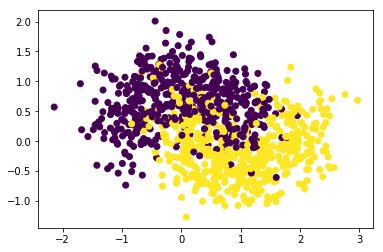

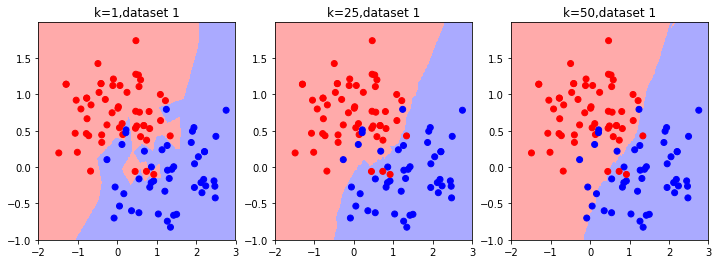

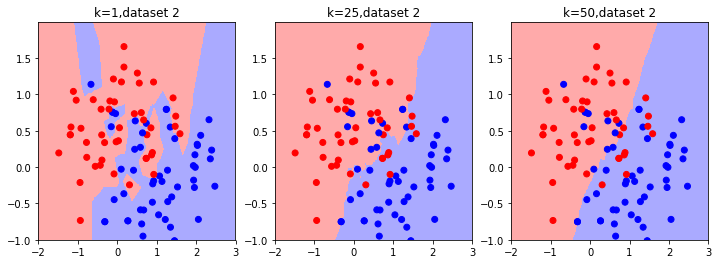

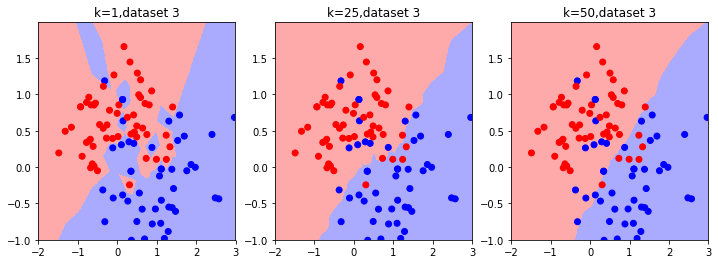

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Created dataset
x, y = make_moons(n_samples=1000, noise=0.35)
# Plot data
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.show()

# sampling (with replacement)
for i in range(3):
    locals()['x'+str(i+1)] = np.zeros((100,2))
    locals()['y'+str(i+1)] = []
    for j in range(100):
        a = np.random.randint(1,1001)
        locals()['x'+str(i+1)][j,] = x[a,]
        locals()['y'+str(i+1)].append(y[a])
    locals()['y'+str(i+1)] = np.asarray(locals()['y'+str(i+1)])

# Knn and plot
k=[1,25,50]
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000',  '#0000FF'])
for i in range(3):
    plt.figure(figsize=(12,4))
    for j in k:
        plt.subplot(1,3,k.index(j)+1)
        knn = KNeighborsClassifier(n_neighbors=j,n_jobs=4)
        knn.fit(locals()['x'+str(i+1)],locals()['y'+str(i+1)].ravel())
        xx,yy = np.meshgrid(np.arange(-2,3,0.01),np.arange(-1,2,0.01))
        Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
        plt.scatter(locals()['x'+str(i+1)][:,0],locals()['x'+str(i+1)][:,1],
                    c=locals()['y'+str(i+1)], cmap=cmap_bold)
        plt.title('k={},dataset {}'.format(j,i+1))
    plt.show()

**ANSWER**

(e) The k=1 classifier can best separate the two classes of training data but varies the most among different datasets. The k=25 classifier have some errors on the traing data but successfully created a boundary similar to true trend. This k=25 classifier also shows smaller difference among datasets. When k=50, the result boundary is more stable among datasets but failed to perform a satisfying seperation on the data points.

(f) On one hand, when k=1, the boundary generated from different dataset is highly variable while the boundary is more fixed for a higher k. On the other hand, more training data points will fall into the wrong catagory if predicting with higher k, representing higher bias. Therefore, with a increasing k value, the variance of the classifier decreases but the bias increases. It can be considered as a trade-off between variance and bias.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

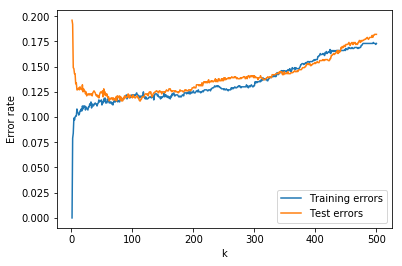

Optimal k: 61


In [340]:
# Created test dataset
x_test, y_test = make_moons(n_samples=1000, noise=0.35)

# Get error of knn
err_train = []
err_test = []
k = []


for i in range(500):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(x,y)
    k.append(i+1)
    err_train.append(1-knn.score(x,y))
    err_test.append(1-knn.score(x_test,y_test))
    
# Plot
plt.plot(k, err_train, label = "Training errors")
plt.plot(k, err_test, label = "Test errors")
plt.legend()
plt.xlabel('k')
plt.ylabel('Error rate')
plt.show()

# Get optimal k
print("Optimal k:", err_test.index(min(err_test)))

**ANSWER**

(c) The training errors increases with increasing k value. The test error initially decrease then increase with increasing k value.

(d) Large values of k represent high bias while small values of k represent high variance.

(e) The optimal k value is printed above. (The value is subject to change for different test dataset). The bias of model increases with k while variance decrease. At a balance point, the rate of increase in bias equals the rate of decrease in variance. The k value at the balance point is optimal because it represents lowest test error.

(f) In many models, the number of parameters controls the flexibility. The model would be relatively more flexible with more parameters.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

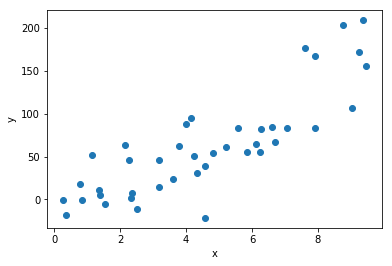

(b) Model 1 (Linear regression):
R2 value: 0.701	 Mean square error: 1052.6
The equation is y = -21.7 + 18.3x
  
(c) Model 2 (Multiple regression):
R2 value: 0.749	 Mean square error: 884.8
The equation is y = 8.0 + 0.47x + 1.83x^2  


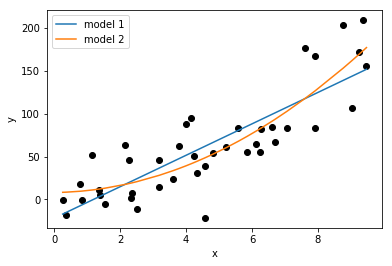

(e) For test data
Model 1:
R2 value: 0.556	 Mean square error: 2023.3
Model 2:
R2 value: 0.693	 Mean square error: 1398.9 


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

# Plot training data
plt.scatter(x_train, y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Fit linear model
x_train = np.asarray(x_train).reshape(len(x_train),1)
y_train = np.asarray(y_train).reshape(len(y_train),1)
lm = LinearRegression()
lm.fit(x_train, y_train)
pred_train = lm.predict(x_train)
a1 = lm.coef_
a0 = lm.intercept_
R2 = lm.score(x_train, y_train)
MSE = mean_squared_error(y_train, pred_train)
print ('(b) Model 1 (Linear regression):\n\
R2 value: {:.3f}\t Mean square error: {:.1f}\n\
The equation is y = {:.1f} + {:.1f}x\n \
 '.format(R2, MSE, a0[0], a1[0,0]))

# Multiple regression
x_train_m = np.c_[x_train, x_train**2]
mlm = LinearRegression()
mlm.fit(x_train_m, y_train)
pred_train_m = mlm.predict(x_train_m)
a1_m = mlm.coef_
a0_m = mlm.intercept_
R2_m = mlm.score(x_train_m, y_train)
MSE_m = mean_squared_error(y_train, pred_train_m)
print ('(c) Model 2 (Multiple regression):\n\
R2 value: {:.3f}\t Mean square error: {:.1f}\n\
The equation is y = {:.1f} + {:.2f}x + {:.2f}x^2 \
 '.format(R2_m, MSE_m, a0_m[0], a1_m[0,0], a1_m[0,1]))

# Plot models
plt.scatter(x_train, y_train,c='black')
plt.plot(sorted(x_train), sorted(pred_train), label = "model 1")
plt.plot(sorted(x_train), sorted(pred_train_m),label = "model 2")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Fit test data
x_test = np.asarray(x_test).reshape(len(x_test),1)
x_test_m = np.c_[x_test, x_test**2]
pred_test = lm.predict(x_test)
R2_t = lm.score(x_test, y_test)
MSE_t = mean_squared_error(y_test, pred_test)
pred_test_m = mlm.predict(x_test_m)
R2_t_m = mlm.score(x_test_m, y_test)
MSE_t_m = mean_squared_error(y_test, pred_test_m)
print ('(e) For test data\nModel 1:\n\
R2 value: {:.3f}\t Mean square error: {:.1f}\nModel 2:\n\
R2 value: {:.3f}\t Mean square error: {:.1f}\
 '.format(R2_t, MSE_t, R2_t_m, MSE_t_m))


**ANSWER**

(f) The multiple regression model y = 8.0 + 0.47x + 1.83x^2 performs better on both the training and testing data as the R^2 is larger and the MSE is smaller. It is because the original data has a slight trend of non-linearity which cannot be explained by the simple model of y = -21.7 + 18.3x.

(g) Significantly different test data will reduce the predictive of my model. My model can only perform well on dataset similar to the training data becase it is built by finding the lowest mean square error of the training dataset. 